# Introduction

In [ ]:
"""
What? How to use k-means for vector quantisation

Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_face_compress.html#sphx-glr-auto-examples-cluster-plot-face-compress-py
"""

# Import

In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import cluster
from matplotlib import rcParams

try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)

In [ ]:
"""
What is quantisation?

Quantization is an umbrella term that covers a lot of different techniques to convert input values from a 
large set to output values in a smaller set. 

Analogy. Someone asks you what time it is. You’d look at your watch and say “10:21” but that’s not 100% accurate.
Hours, minutes, and seconds are a convention that we use in order to quantize, or approximate, the continuous 
variable that is time. We simplify time into discrete numbers. 
"""

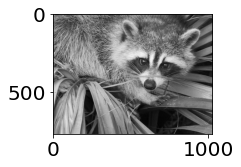

In [18]:
# original face
plt.figure(1, figsize=(3, 2.2))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)

In [19]:
n_clusters = 5
np.random.seed(0)

k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
# We need an (n_sample, n_feature) array
X = face.reshape((-1, 1))  
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

# create an array from labels and values
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()

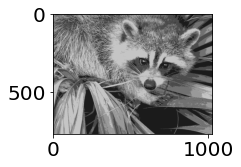

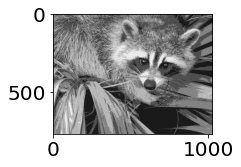

In [20]:
# compressed face
plt.figure(2, figsize=(3, 2.2))
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

# equal bins face
regular_values = np.linspace(0, 256, n_clusters + 1)
regular_labels = np.searchsorted(regular_values, face) - 1
regular_values = .5 * (regular_values[1:] + regular_values[:-1])  # mean
regular_face = np.choose(regular_labels.ravel(), regular_values, mode="clip")
regular_face.shape = face.shape
plt.figure(3, figsize=(3, 2.2))
plt.imshow(regular_face, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

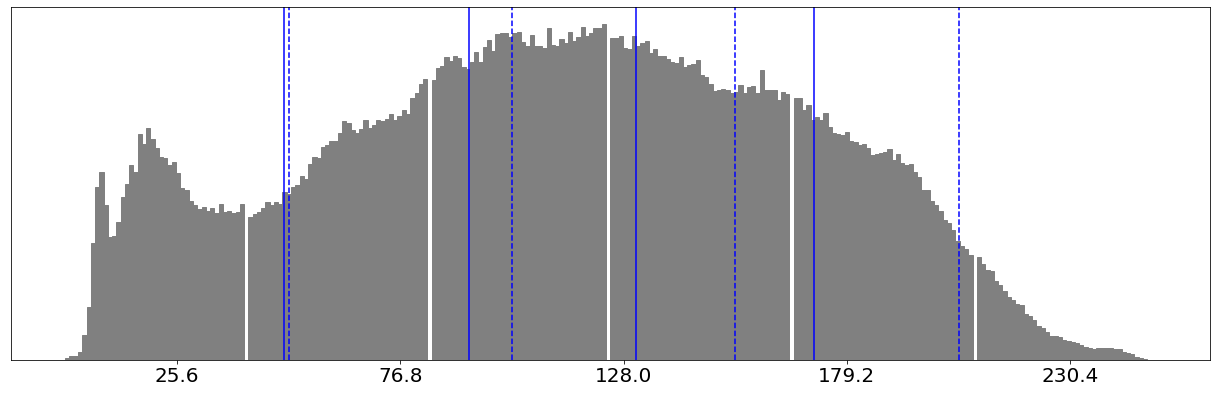

In [21]:
# histogram
rcParams['font.size'] = 20
rcParams['figure.figsize'] = 17, 5
plt.figure()
plt.clf()
plt.axes([.01, .01, .98, .98])
plt.hist(X, bins=256, color='.5', edgecolor='.5')
plt.yticks(())
plt.xticks(regular_values)
values = np.sort(values)
for center_1, center_2 in zip(values[:-1], values[1:]):
    plt.axvline(.5 * (center_1 + center_2), color='b')

for center_1, center_2 in zip(regular_values[:-1], regular_values[1:]):
    plt.axvline(.5 * (center_1 + center_2), color='b', linestyle='--')

plt.show()